## Least Angle Regression (LAR)

LAR is relatively newcomer to the regression family. It is closely associated with LASSO. It is a democratic version of forward-stepwise regression[1].

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

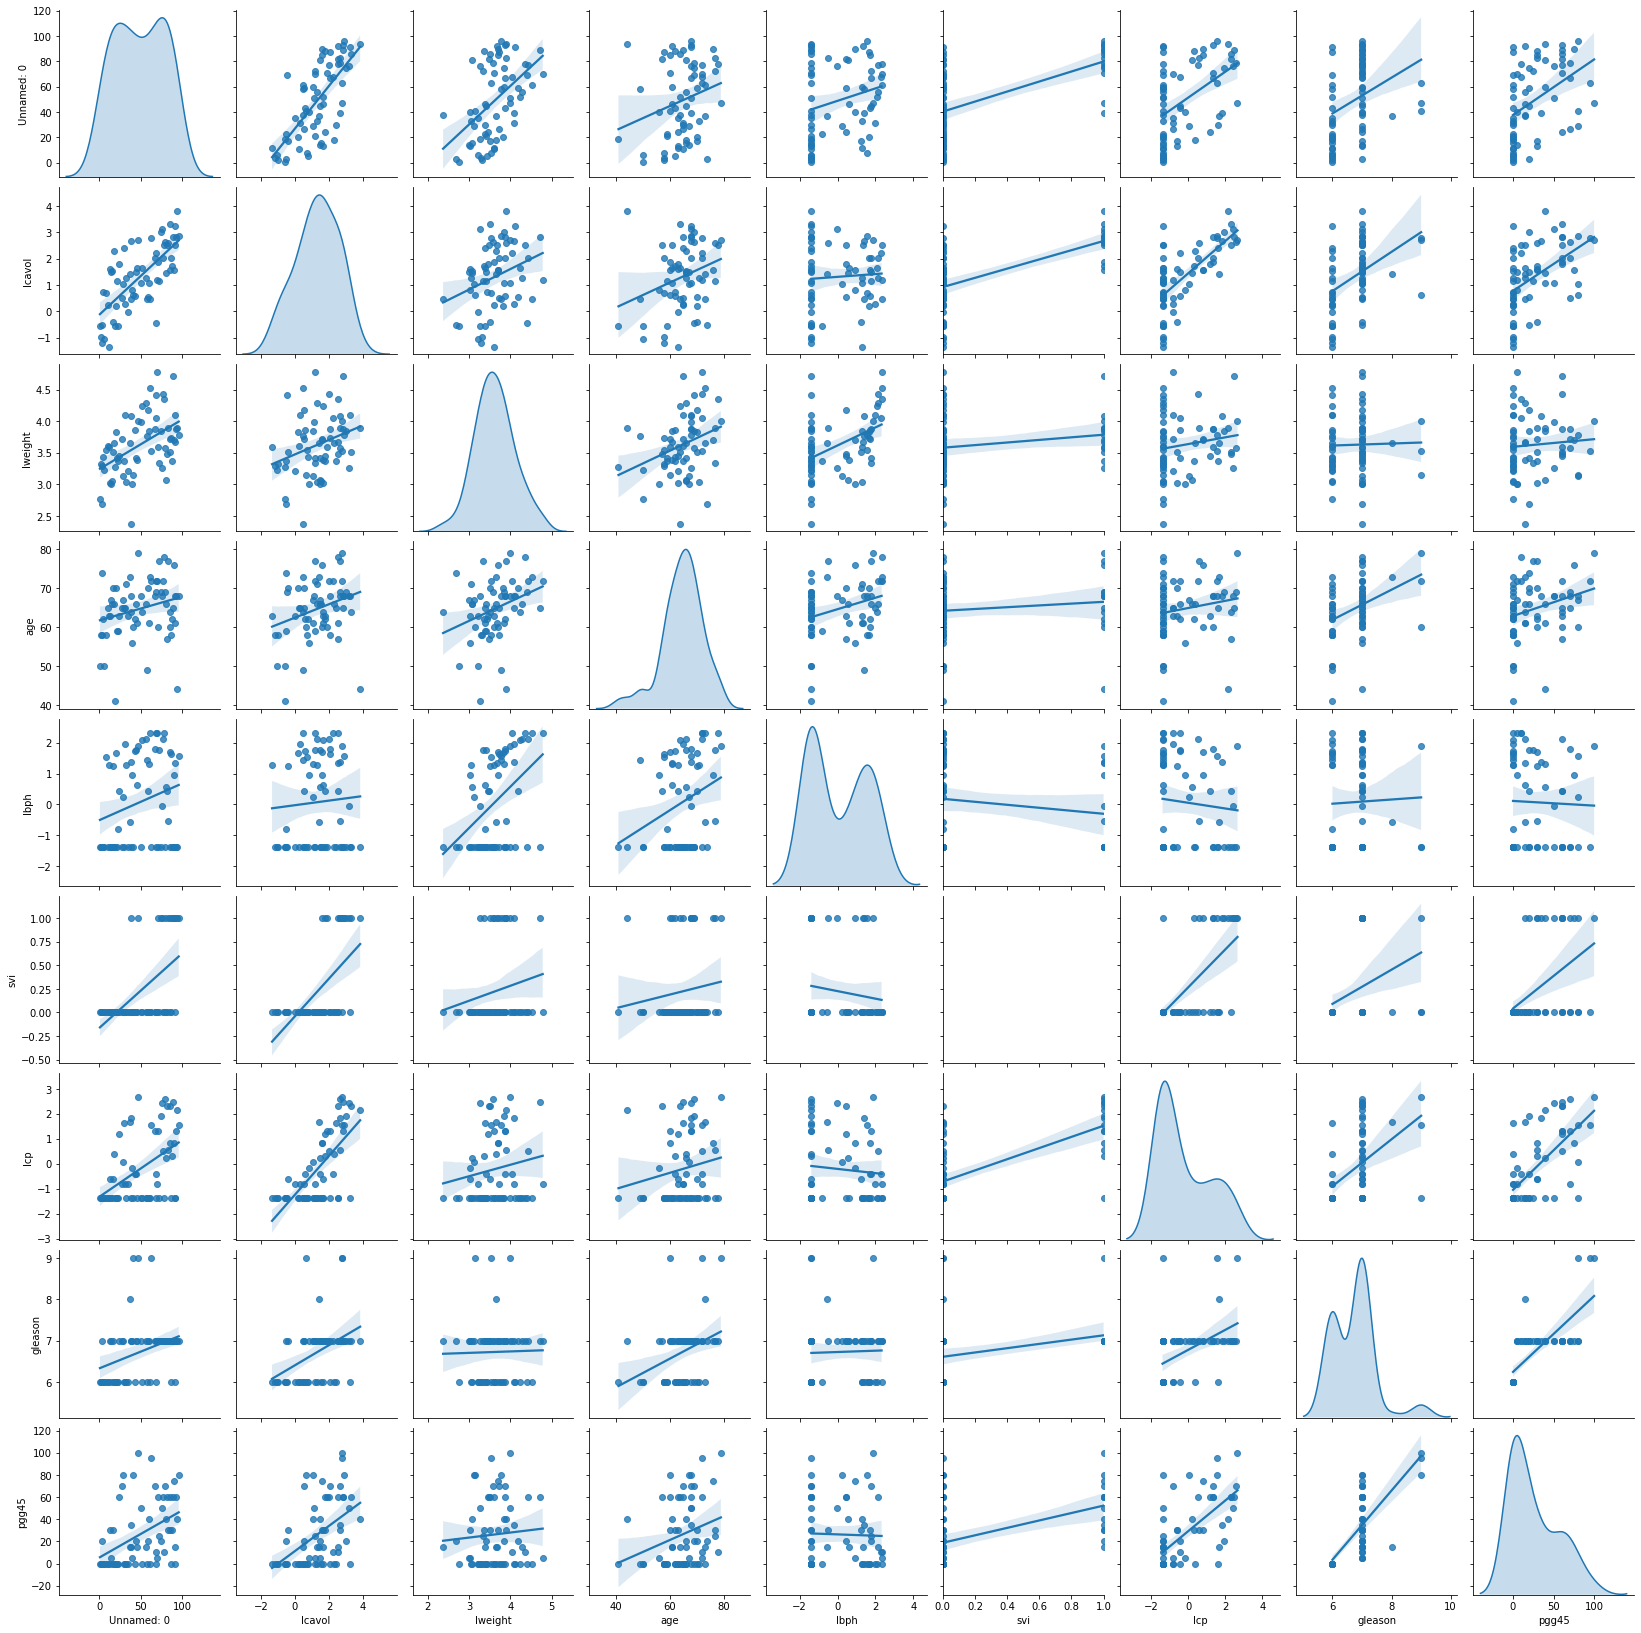

In [6]:
df = pd.read_csv("E:/Consultancy/DS Train/Lec14 Least Angle Regression/data/prostate.data.txt",sep="\t")
train_df = df[df["train"]=="T"]
y_train = train_df["lpsa"]
x_train = train_df.drop(["lpsa","train"],axis=1)
test_df = df[df["train"]=="F"]
y_test = test_df["lpsa"]
x_test = test_df.drop(["lpsa","train"],axis=1)

sns.pairplot(x_train,kind='reg',diag_kind='kde')
plt.show()

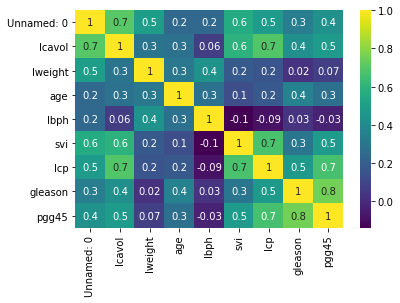

In [7]:
sns.heatmap(x_train.corr(),annot=True,fmt="0.1g",cmap="viridis")
plt.show()

In [8]:
model = linear_model.Lars().fit(x_train,y_train)
y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.round(np.sqrt(MSE),2)
print(f"RMSE {RMSE}")
print(model.coef_)


RMSE 0.36
[ 0.03399017  0.14537624  0.0561382  -0.00709122  0.04602672  0.06603293
 -0.05244183 -0.04161636  0.00309231]


In [9]:
print("Computing Regularizing Path Using LAR\n")
coefs = model.coef_path_
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

Computing Regularizing Path Using LAR



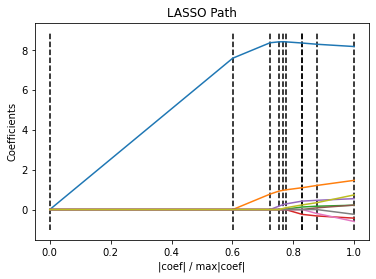

In [10]:
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [11]:
print("Using Lasso LARS Algorithm\n")

model_lasso_LARS  = linear_model.LassoLars(alpha=0.1).fit(x_train,y_train)
y_pred = model_lasso_LARS.predict(x_test)
MSE_LassoLARS =mean_squared_error(y_test,y_pred)
RMSE = np.round(np.sqrt(MSE_LassoLARS),2)

print(f"RMSE LASSO LARS {RMSE}")


Using Lasso LARS Algorithm

RMSE LASSO LARS 0.77


In [13]:
print("Using LASSO Algorithm \n")

lasso = linear_model.Lasso(alpha=0.1,normalize=True).fit(x_train,y_train)
y_pred = lasso.predict(x_test)
MSE_Lasso = mean_squared_error(y_test, y_pred)
RMSE_Lasso = np.round(np.sqrt(MSE),2)
print(f"Lasso Alogrithm {RMSE_Lasso}")

Using LASSO Algorithm 

Lasso Alogrithm 0.36


Using Ridge Regression 



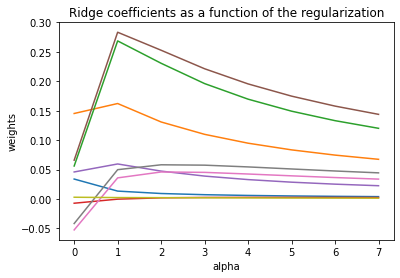

In [30]:
print("Using Ridge Regression \n")

no_alphas=100
alphas = np.arange(0,8)
coefs=[]
ridge_coeff=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a,fit_intercept=True,normalize=True)
    ridge.fit(x_train,y_train)
    coefs.append(ridge.coef_)
    

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('linear')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()    


#### References:

1. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). An introduction to statistical learning : with applications in R. New York :Springer